# Data Cleaning

### Import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

/Users/leforestierlucas/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
data = pd.read_csv("../input_data/spendtracker.csv", delimiter = ",", index_col = 0)
data.Region.fillna("Worldwide", inplace = True)
data = data[(data.Component == "Analog IC")]
data.reset_index(inplace = True, drop = True)
data = data.iloc[:, 1:]
data

#data.Value = data.Value.apply(lambda x : float(x.replace(',', '.')))
#data

<ipython-input-2-76f7acdeaf99>:1: DtypeWarning: Columns (2,6,7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("../input_data/spendtracker.csv", delimiter = ",", index_col = 0)


,Region,Device,Market,Component,SubMarket,Headquarter,CompanyName,Consumption,PeriodCode,Value
0,Worldwide,Amplifier/Comparator,Automotive,Analog IC,Auto ADAS,NaN,Aisin Corporation,NaN,Y2018,0.1684
1,Worldwide,Amplifier/Comparator,Automotive,Analog IC,Auto ADAS,NaN,Aisin Corporation,NaN,Y2019,0.1781
2,Worldwide,Amplifier/Comparator,Automotive,Analog IC,Auto ADAS,NaN,Aisin Corporation,NaN,Y2020,0.1799
3,Worldwide,Amplifier/Comparator,Automotive,Analog IC,Auto ADAS,NaN,Aisin Corporation,NaN,Y2021,0.3652
4,Worldwide,Amplifier/Comparator,Automotive,Analog IC,Auto ADAS,NaN,Aisin Corporation,NaN,Y2022,0.3821
...,...,...,...,...,...,...,...,...,...,...
109790,Japan,Voltage Regulator/Reference,Wireless Communications,Analog IC,NaN,NaN,ZTE,NaN,Y2020,0.0000
109791,Japan,Voltage Regulator/Reference,Wireless Communications,Analog IC,NaN,NaN,ZTE,NaN,Y2021,0.0000
109792,Japan,Voltage Regulator/Reference,Wireless Communications,Analog IC,NaN,NaN,ZTE,NaN,Y2022,0.0000
109793,Japan,Voltage Regulator/Reference,Wireless Communications,Analog IC,NaN,NaN,ZTE,NaN,Y2023,0.0000


In [3]:
nb_submarket = data[(data.Region == "Worldwide")].loc[:, ["SubMarket", "CompanyName", "Market"]].groupby(["CompanyName", "Market"]).nunique()
nb_submarket

SubMarket
CompanyName        Market                                   
ABB                Industrial                              2
AMETEK             Industrial                              4
ARRIS Group        Consumer                                1
                   Wired Communications                    2
ASML               Industrial                              2
...                                                      ...
Zebra Technologies Computer Peripherals & Storage          1
                   Computer Platforms                      2
                   Wired Communications                    2
                   Wireless Communications                 2
iRobot             Consumer                                1

[527 rows x 1 columns]

In [4]:
nb_submarket[(nb_submarket.SubMarket > 1)]

SubMarket
CompanyName        Market                                   
ABB                Industrial                              2
AMETEK             Industrial                              4
ARRIS Group        Wired Communications                    2
ASML               Industrial                              2
Acer               Computer Peripherals & Storage          2
...                                                      ...
ZTE                Wired Communications                    3
                   Wireless Communications                 4
Zebra Technologies Computer Platforms                      2
                   Wired Communications                    2
                   Wireless Communications                 2

[285 rows x 1 columns]

In [5]:
nb_market = data[(data.Region == "Worldwide")].loc[:, ["CompanyName", "Market"]].groupby(["CompanyName"]).nunique().sum()
nb_market

Market    527
dtype: int64

In [6]:
nb_submarket[(nb_submarket.index == ("AMETEK", "Industrial"))]

,,SubMarket
CompanyName,Market,
AMETEK,Industrial,4


In [7]:
data[(data.CompanyName == "AMETEK") & (data.Market == "Industrial") & (data.Region == "Worldwide")].groupby("SubMarket").sum()

,Value
SubMarket,
Manufacturing Equipment,93.9504
Military/Aerospace,13.8428
Other Industrial,9.5530
Test & Measurement,154.0569


## Value Per SubMarket

### Get the Pourcentage Matrix

In [8]:
total_submarket = data[(data.Region == "Worldwide")].loc[:, ["SubMarket", "CompanyName", "PeriodCode", "Device", "Value"]].groupby(["CompanyName", "SubMarket", "PeriodCode", "Device"]).sum()
total_market = data[(data.Region == "Worldwide")].loc[:, ["Market", "CompanyName", "PeriodCode", "Device", "Value"]].groupby(["CompanyName", "Market", "PeriodCode", "Device"]).sum()

In [9]:
pourcentage_data = data[(data.Region == "Worldwide")].loc[:, ["CompanyName", "Market", "SubMarket", "PeriodCode", "Device"]]
pourcentage = []
for x in pourcentage_data.index:
    pourcentage.append(total_submarket.loc[(pourcentage_data.loc[x, "CompanyName"], pourcentage_data.loc[x, "SubMarket"], pourcentage_data.loc[x, "PeriodCode"], pourcentage_data.loc[x, "Device"])].values[0]/
                       total_market.loc[(pourcentage_data.loc[x, "CompanyName"], pourcentage_data.loc[x, "Market"], pourcentage_data.loc[x, "PeriodCode"], pourcentage_data.loc[x, "Device"])].values[0])
pourcentage_data["pourcentage"] = pourcentage
pourcentage_data.drop_duplicates(inplace = True)
pourcentage_data.sort_values(by = ['CompanyName', 'Market', 'SubMarket'], inplace = True)
pourcentage_data

<ipython-input-9-df1f623a1754>:4: RuntimeWarning: invalid value encountered in double_scalars
  pourcentage.append(total_submarket.loc[(pourcentage_data.loc[x, "CompanyName"], pourcentage_data.loc[x, "SubMarket"], pourcentage_data.loc[x, "PeriodCode"], pourcentage_data.loc[x, "Device"])].values[0]/


,CompanyName,Market,SubMarket,PeriodCode,Device,pourcentage
3542,ABB,Industrial,Manufacturing Equipment,Y2018,Amplifier/Comparator,0.515745
3543,ABB,Industrial,Manufacturing Equipment,Y2019,Amplifier/Comparator,0.504231
3544,ABB,Industrial,Manufacturing Equipment,Y2020,Amplifier/Comparator,0.497219
3545,ABB,Industrial,Manufacturing Equipment,Y2021,Amplifier/Comparator,0.550427
3546,ABB,Industrial,Manufacturing Equipment,Y2022,Amplifier/Comparator,0.580242
...,...,...,...,...,...,...
31152,iRobot,Consumer,Appliance,Y2020,Voltage Regulator/Reference,1.000000
31153,iRobot,Consumer,Appliance,Y2021,Voltage Regulator/Reference,1.000000
31154,iRobot,Consumer,Appliance,Y2022,Voltage Regulator/Reference,1.000000
31155,iRobot,Consumer,Appliance,Y2023,Voltage Regulator/Reference,1.000000


### Get the Proxy Value

In [10]:
final_data = data.copy()
final_data = data[(data.Region != "Worldwide")].loc[:, ["Region", "CompanyName", "Device", "Market", "PeriodCode", "Value"]]
final_data

,Region,CompanyName,Device,Market,PeriodCode,Value
36015,Americas,Adient,Amplifier/Comparator,Automotive,Y2018,1.0385
36016,Americas,Adient,Amplifier/Comparator,Automotive,Y2019,1.0652
36017,Americas,Adient,Amplifier/Comparator,Automotive,Y2020,0.8038
36018,Americas,Adient,Amplifier/Comparator,Automotive,Y2021,1.1561
36019,Americas,Adient,Amplifier/Comparator,Automotive,Y2022,1.1376
...,...,...,...,...,...,...
109790,Japan,ZTE,Voltage Regulator/Reference,Wireless Communications,Y2020,0.0000
109791,Japan,ZTE,Voltage Regulator/Reference,Wireless Communications,Y2021,0.0000
109792,Japan,ZTE,Voltage Regulator/Reference,Wireless Communications,Y2022,0.0000
109793,Japan,ZTE,Voltage Regulator/Reference,Wireless Communications,Y2023,0.0000


In [11]:
final_df = []
for x in final_data.index:
    for y in pourcentage_data[(pourcentage_data.CompanyName == final_data.loc[x, "CompanyName"]) &
                              (pourcentage_data.Market == final_data.loc[x, "Market"]) &
                              (pourcentage_data.Device == final_data.loc[x, "Device"]) &
                               (pourcentage_data.PeriodCode == final_data.loc[x, "PeriodCode"])].SubMarket.unique():
        row = []
        row += list(final_data.loc[x, :])
        row.append(y)
        row.append(pourcentage_data[(pourcentage_data.CompanyName == final_data.loc[x, "CompanyName"]) &
                              (pourcentage_data.Market == final_data.loc[x, "Market"]) &
                              (pourcentage_data.Device == final_data.loc[x, "Device"]) &
                              (pourcentage_data.PeriodCode == final_data.loc[x, "PeriodCode"]) &
                              (pourcentage_data.SubMarket == y)].pourcentage.values[0])
        final_df.append(row)

final_df = pd.DataFrame(final_df, columns = ["Region", "CompanyName", "Device", "Market", "PeriodCode", "Value", " SubMarket", "Pourcentage"])
final_df["Value"] = final_df.Value * final_df.Pourcentage
final_df.drop(["Pourcentage"], axis = 1, inplace = True)
final_df.Value.fillna(0.0, inplace = True)
final_df

,Region,CompanyName,Device,Market,PeriodCode,Value,SubMarket
0,Americas,Adient,Amplifier/Comparator,Automotive,Y2018,1.0385,Other Auto & Aftermarket
1,Americas,Adient,Amplifier/Comparator,Automotive,Y2019,1.0652,Other Auto & Aftermarket
2,Americas,Adient,Amplifier/Comparator,Automotive,Y2020,0.8038,Other Auto & Aftermarket
3,Americas,Adient,Amplifier/Comparator,Automotive,Y2021,1.1561,Other Auto & Aftermarket
4,Americas,Adient,Amplifier/Comparator,Automotive,Y2022,1.1376,Other Auto & Aftermarket
...,...,...,...,...,...,...,...
144055,Japan,ZTE,Voltage Regulator/Reference,Wireless Communications,Y2023,0.0000,Other Wireless
144056,Japan,ZTE,Voltage Regulator/Reference,Wireless Communications,Y2024,0.0000,Handset
144057,Japan,ZTE,Voltage Regulator/Reference,Wireless Communications,Y2024,0.0000,Infrastructure
144058,Japan,ZTE,Voltage Regulator/Reference,Wireless Communications,Y2024,0.0000,Media Tablets


In [23]:
final_df.to_csv("../clean_data/cleaned_spend_data.csv")

### Other way

In [24]:
submarket = pourcentage_data.SubMarket.unique()
submarket

array(['Manufacturing Equipment', 'Power & Energy', 'Military/Aerospace',
       'Other Industrial', 'Test & Measurement', 'STB', 'Carrier',
       'Enterprise/SOHO', 'Other Peripherals', 'Medical', 'Other Storage',
       'Data Center Servers', 'Desktop PCs', 'Notebook PCs',
       'Other Computer Products', 'Tablet PCs', 'Other Consumer',
       'Handset', 'Media Tablets', 'Other Auto & Aftermarket',
       'Smart Cards', 'Auto ADAS', 'Auto Infotainment', 'Auto Powertrain',
       'Connected Consumer', 'Infrastructure', 'Other Wireless', 'Audio',
       'Appliance', 'TV', 'Other Wired', 'DC Network & Threat Mitigation',
       'Flash Cards/Drives', 'Video Games', 'HDD'], dtype=object)

In [26]:
final_data_bis = data.copy()
final_data_bis = final_data_bis[(final_data_bis.Region != "Worldwide")].loc[:, ["Region", "CompanyName", "Device", "Market", "PeriodCode", "Value"]]
final_df_bis = []
for x in final_data_bis.index:
    for sub in submarket:
        row = []
        row += list(final_data_bis.loc[x, :])
        row.append(sub)
        final_df_bis.append(row)

final_df_bis = pd.DataFrame(final_df_bis, columns = ["Region", "CompanyName", "Device", "Market", "PeriodCode", "Value", "SubMarket"])
final_df_bis
    

,Region,CompanyName,Device,Market,PeriodCode,Value,SubMarket
0,Americas,Adient,Amplifier/Comparator,Automotive,Y2018,1.0385,Manufacturing Equipment
1,Americas,Adient,Amplifier/Comparator,Automotive,Y2018,1.0385,Power & Energy
2,Americas,Adient,Amplifier/Comparator,Automotive,Y2018,1.0385,Military/Aerospace
3,Americas,Adient,Amplifier/Comparator,Automotive,Y2018,1.0385,Other Industrial
4,Americas,Adient,Amplifier/Comparator,Automotive,Y2018,1.0385,Test & Measurement
...,...,...,...,...,...,...,...
2582295,Japan,ZTE,Voltage Regulator/Reference,Wireless Communications,Y2024,0.0000,Other Wired
2582296,Japan,ZTE,Voltage Regulator/Reference,Wireless Communications,Y2024,0.0000,DC Network & Threat Mitigation
2582297,Japan,ZTE,Voltage Regulator/Reference,Wireless Communications,Y2024,0.0000,Flash Cards/Drives
2582298,Japan,ZTE,Voltage Regulator/Reference,Wireless Communications,Y2024,0.0000,Video Games


In [27]:
final = final_df_bis.merge(pourcentage_data, how = 'left', on = ["CompanyName", "Device", "Market", "PeriodCode", "SubMarket"])
final = final[final['pourcentage'].notna()]
final.Value = final.Value * final.pourcentage
final.drop("pourcentage", axis = 1, inplace = True)

## Regression

In [28]:
clean = pd.read_csv("../clean_data/cleaned_spend_data.csv")
clean

,Unnamed: 0,Region,CompanyName,Device,Market,PeriodCode,Value,SubMarket
0,0,Americas,Adient,Amplifier/Comparator,Automotive,Y2018,1.0385,Other Auto & Aftermarket
1,1,Americas,Adient,Amplifier/Comparator,Automotive,Y2019,1.0652,Other Auto & Aftermarket
2,2,Americas,Adient,Amplifier/Comparator,Automotive,Y2020,0.8038,Other Auto & Aftermarket
3,3,Americas,Adient,Amplifier/Comparator,Automotive,Y2021,1.1561,Other Auto & Aftermarket
4,4,Americas,Adient,Amplifier/Comparator,Automotive,Y2022,1.1376,Other Auto & Aftermarket
...,...,...,...,...,...,...,...,...
144055,144055,Japan,ZTE,Voltage Regulator/Reference,Wireless Communications,Y2023,0.0000,Other Wireless
144056,144056,Japan,ZTE,Voltage Regulator/Reference,Wireless Communications,Y2024,0.0000,Handset
144057,144057,Japan,ZTE,Voltage Regulator/Reference,Wireless Communications,Y2024,0.0000,Infrastructure
144058,144058,Japan,ZTE,Voltage Regulator/Reference,Wireless Communications,Y2024,0.0000,Media Tablets


In [29]:
clean.PeriodCode = clean.PeriodCode.apply(lambda x: int(x[1:]))
clean = clean.iloc[:, 1:]
clean['SubMarket'] = clean[" SubMarket"]
clean.drop([" SubMarket"], axis = 1, inplace = True)

### Features Pre Processing

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import preprocessing
from scipy import stats
import statsmodels.api as sm

### TRY 1

In [31]:
data_reg = pd.get_dummies(clean, columns=['Device', 'Region', 'SubMarket'])
data_reg = data_reg.iloc[:, 2:]
data_reg

,PeriodCode,Value,Device_Amplifier/Comparator,Device_Analog Application Specific IC,Device_Data Converters,Device_Interface,Device_Voltage Regulator/Reference,Region_Americas,Region_Asia & Oceania (exc. Japan),Region_EMEA,...,SubMarket_Other Storage,SubMarket_Other Wired,SubMarket_Other Wireless,SubMarket_Power & Energy,SubMarket_STB,SubMarket_Smart Cards,SubMarket_TV,SubMarket_Tablet PCs,SubMarket_Test & Measurement,SubMarket_Video Games
0,2018,1.0385,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2019,1.0652,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2020,0.8038,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2021,1.1561,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2022,1.1376,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144055,2023,0.0000,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
144056,2024,0.0000,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
144057,2024,0.0000,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
144058,2024,0.0000,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [32]:
X_train, X_test = data_reg[(data_reg.PeriodCode <= 2022)], data_reg[(data_reg.PeriodCode >= 2023)]
y_train = np.array(X_train.pop("Value"))
y_test = np.array(X_test.pop("Value"))
scaler = preprocessing.StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)


reg = linear_model.Lasso(alpha=0.1).fit(X_scaled, y_train)
reg.score(X_scaled, y_train)

0.020900864870299074

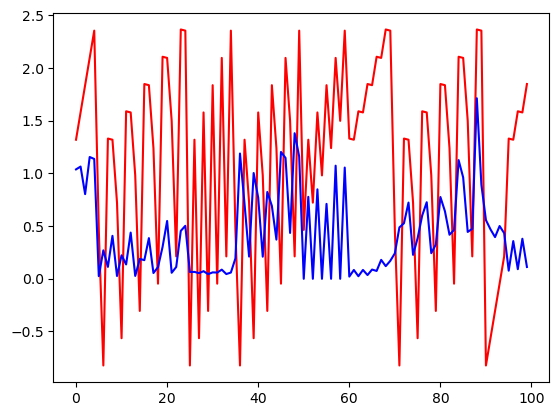

In [33]:
plt.plot(reg.predict(X_scaled[:100]), color = "r")
plt.plot(y_train[:100], color = "b")
plt.show()

In [34]:
y_train[:100]

array([1.0385    , 1.0652    , 0.8038    , 1.1561    , 1.1376    ,
       0.02526108, 0.27044659, 0.11305985, 0.40773248, 0.02671532,
       0.22320271, 0.13647165, 0.43841032, 0.02698587, 0.18897607,
       0.17691568, 0.38602239, 0.05478108, 0.11124219, 0.30191094,
       0.5489658 , 0.05731678, 0.11214348, 0.45469412, 0.50314562,
       0.0646174 , 0.0656826 , 0.05358   , 0.07232   , 0.04394291,
       0.06095709, 0.05928325, 0.08691675, 0.0450844 , 0.0595156 ,
       0.19404278, 1.18912104, 0.70993618, 0.21092411, 1.00394751,
       0.77002839, 0.20993591, 0.8244767 , 0.69238739, 0.37197723,
       1.2040487 , 1.14747406, 0.43556553, 1.38177239, 1.16026208,
       0.        , 0.7779    , 0.        , 0.8491    , 0.        ,
       0.7111    , 0.        , 1.0736    , 0.        , 1.0558    ,
       0.02105582, 0.08394418, 0.02465292, 0.08434708, 0.03569293,
       0.08780707, 0.07466121, 0.17973879, 0.12017708, 0.17062292,
       0.24167573, 0.48771948, 0.5271366 , 0.72336819, 0.22697

### Try 2

In [35]:
company_name = clean.CompanyName.unique()
company_name

array(['Adient', 'Aisin Corporation', 'Alps Alpine', 'Aptiv PLC',
       'AutoLiv', 'BorgWarner', 'Bosch Group', 'Bose', 'Brose',
       'Calsonic Kansei', 'Continental', 'Delphi Technologies',
       'Delta Electronics', 'Denso', 'Eaton', 'Faurecia', 'Garmin',
       'Harman International', 'Hella', 'Hikvision', 'Hitachi',
       'Hitachi Astemo', 'Honeywell', 'Humax', 'Hyundai Mobis', 'JTEKT',
       'JVC Kenwood', 'Kyocera', 'Lear', 'LG Electronics',
       'Lite-on Group', 'Magna International', 'Magneti Marelli / Fiat',
       'Mando', 'Micro-Star (MSI)', 'MiTAC', 'Mitsubishi Electric',
       'Ningbo Joyson Electronic Corp', 'Omron', 'Osram', 'Panasonic',
       'Philips', 'Pioneer', 'SiriusXM', 'Skyworth', 'Sony', 'Tesla',
       'Thyssenkrupp', 'TomTom', 'Valeo', 'Veoneer', 'Visteon',
       'Voxx International', 'VTech', 'ZF Group', 'Acer', 'Agfa-Gevaert',
       'Apple', 'Asustek Computer', 'Atos', 'AU Optronics', 'Blackberry',
       'Brother Industries', 'Canon', 'Casio Com

In [36]:
def plot_reg(df, company_name, region):
    if region != "all":
        assert len(df[(df.CompanyName == company_name) & (df.Region.str.startswith(region))]) > 1, "No compatible Company/Region"

    if region == "all":
        print(f"Aggregation of {df[(df.CompanyName == company_name) & (df.Value > 0.0)].Region.unique()}")
        data = df.loc[:, ['CompanyName', 'Market', 'PeriodCode', 'Value']].groupby(["CompanyName", "Market", "PeriodCode"]).sum().reset_index()
        data = data[(data.CompanyName == company_name)]
        
        data.sort_values(['Market', 'PeriodCode'])
        list_market = data.Market.unique()
        for mark in list_market:
            y_train = np.array(data[(data.Market == mark)].Value)
            X_train = np.array([i for i in range(2018, 2025)]).reshape(-1, 1)
            X_bis = sm.add_constant(X_train)
            est = sm.OLS(y_train, X_bis)
            reg = est.fit()
            #plt.plot([i for i in range(2018, 2028)], np.concatenate([y_train, np.array(reg.predict(np.array([2025, 2026, 2027]).reshape(-1, 1)))]), color = "r")
            plt.scatter([i for i in range(2018, 2025)], y_train, color = "r")
            X_test = np.array([2025, 2026, 2027]).reshape(-1, 1)
            X_test_bis = sm.add_constant(X_test)
            plt.scatter([i for i in range(2025, 2028)], np.array(reg.predict(X_test_bis)), color = "b", label = "Extended Forecast")
            plt.plot([i for i in range(2018, 2028)], [reg.params[0] + x*reg.params[1] for x in range(2018, 2028)], color = "k", label = f"P-value = {round(reg.pvalues[1], 3)}")
            plt.title(f"Evolution of Spending for {company_name} in {mark} Worldwide")
            plt.legend()
            plt.show()

    else : 
        data = df[(df.Region.str.startswith(region))]
        data = data.loc[:, ['CompanyName', 'Market', 'PeriodCode', 'Value']].groupby(["CompanyName", "Market", "PeriodCode"]).sum().reset_index()
        data = data[(data.CompanyName == company_name)]
        data.sort_values(['Market', 'PeriodCode'])
        list_market = data.Market.unique()
        for mark in list_market:
            y_train = np.array(data[(data.Market == mark)].Value)
            X_train = np.array([i for i in range(2018, 2025)]).reshape(-1, 1)
            X_bis = sm.add_constant(X_train)
            est = sm.OLS(y_train, X_bis)
            reg = est.fit()
            #plt.plot([i for i in range(2018, 2028)], np.concatenate([y_train, np.array(reg.predict(np.array([2025, 2026, 2027]).reshape(-1, 1)))]), color = "r")
            plt.scatter([i for i in range(2018, 2025)], y_train, color = "r")
            X_test = np.array([2025, 2026, 2027]).reshape(-1, 1)
            X_test_bis = sm.add_constant(X_test)
            plt.scatter([i for i in range(2025, 2028)], np.array(reg.predict(X_test_bis)), color = "b", label = "Extended Forecast")
            plt.plot([i for i in range(2018, 2028)], [reg.params[0] + x*reg.params[1] for x in range(2018, 2028)], color = "k", label = f"P-value = {round(reg.pvalues[1], 3)}")
            plt.title(f"Evolution of Spending for {company_name} in {mark} in {region}")
            plt.legend()
            plt.show()
        

Aggregation of ['Americas' 'Asia & Oceania (exc. Japan)']


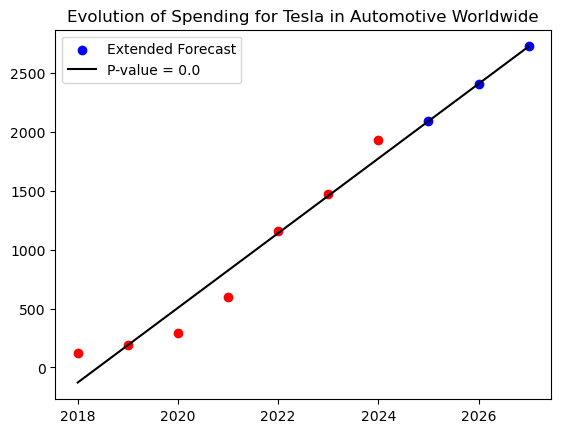

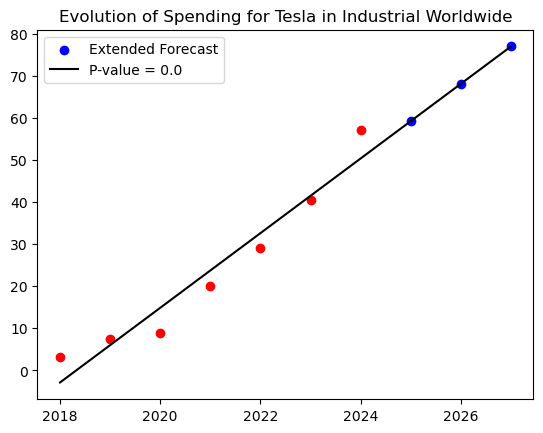

In [37]:
plot_reg(clean, "Tesla", "all")

## Merging New data

In [38]:
market = pd.read_csv("../input_data/market_data.csv")
market.rename(columns = {"Submarket" : "SubMarket"}, inplace=True)
clean.rename(columns = {"PeriodCode" : "Year"}, inplace = True)
market.Market = market.Market.apply(lambda x : x[:-len(" Categories")])
tries = market.loc[:, ["Market", "Market size"]].groupby("Market").sum().reset_index()

In [39]:
tries

,Market,Market size
0,Automotive Electronics,545275.224
1,Computing & Data Storage,225120.348
2,Consumer Electronics,261454.710
3,Industrial Electronics,467764.864
4,Wired Communications,156856.502
5,Wireless Communications,912918.744


In [40]:
clean.Market.unique()

array(['Automotive', 'Computer Peripherals & Storage',
       'Computer Platforms', 'Consumer', 'Industrial',
       'Wired Communications', 'Wireless Communications'], dtype=object)

In [41]:
final  = clean.merge(tries, how = 'left', on = ['Market'])
final

,Region,CompanyName,Device,Market,Year,Value,SubMarket,Market size
0,Americas,Adient,Amplifier/Comparator,Automotive,2018,1.0385,Other Auto & Aftermarket,NaN
1,Americas,Adient,Amplifier/Comparator,Automotive,2019,1.0652,Other Auto & Aftermarket,NaN
2,Americas,Adient,Amplifier/Comparator,Automotive,2020,0.8038,Other Auto & Aftermarket,NaN
3,Americas,Adient,Amplifier/Comparator,Automotive,2021,1.1561,Other Auto & Aftermarket,NaN
4,Americas,Adient,Amplifier/Comparator,Automotive,2022,1.1376,Other Auto & Aftermarket,NaN
...,...,...,...,...,...,...,...,...
144055,Japan,ZTE,Voltage Regulator/Reference,Wireless Communications,2023,0.0000,Other Wireless,912918.744
144056,Japan,ZTE,Voltage Regulator/Reference,Wireless Communications,2024,0.0000,Handset,912918.744
144057,Japan,ZTE,Voltage Regulator/Reference,Wireless Communications,2024,0.0000,Infrastructure,912918.744
144058,Japan,ZTE,Voltage Regulator/Reference,Wireless Communications,2024,0.0000,Media Tablets,912918.744


In [42]:
final['Market size'].unique()

array([       nan, 156856.502, 912918.744])